In [8]:
%matplotlib inline 

import requests 
from io import StringIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy.linalg as lin

In [11]:
#r = requests.get('/Data/CarbonEmisson.csv')
carbon = pd.read_csv(r'/Users/MADHU/Documents/climate change/Data/carbon.csv',index_col='Country')
carbon.head()

1970     1971     1972     1973     1974     1975     1976  \
Country                                                                         
Afghanistan      1062.0   1176.0   1324.0   1434.0   1989.0    904.0    898.0   
Albania          4455.0   4446.0   5058.0   4659.0   4875.0   5037.0   5419.0   
Algeria         19383.0  21831.0  31069.0  40176.0  35373.0  33310.0  41740.0   
American Samoa      6.0      6.0      6.0      7.0      7.0      7.0      7.0   
Angola           8707.0   8653.0   9700.0   9813.0  10032.0   9588.0   8545.0   

                   1977     1978     1979  ...     2004     2005     2006  \
Country                                    ...                              
Afghanistan      1466.0   1395.0   1460.0  ...    513.0    561.0    513.0   
Albania          5725.0   6430.0   7561.0  ...   3845.0   4730.0   4389.0   
Algeria         45957.0  51307.0  53420.0  ...  89276.0  93457.0  98427.0   
American Samoa      7.0      7.0      7.0  ...     18.0     18.0     19.0   
Angola           9216.0  10556.0  10520.0  ...  17430.0  15886.0  15840.0   

                    2007      2008      2009      2010      2011      2012  \
Country                                                                      
Afghanistan        548.0     558.0     559.0     565.0     594.0     608.0   
Albania           4431.0    4369.0    4227.0    4505.0    4869.0    4739.0   
Algeria         102106.0  106292.0  112541.0  114300.0  117063.0  126732.0   
American Samoa      19.0      19.0      20.0      20.0      21.0      21.0   
Angola           16476.0   16306.0   17289.0   18628.0   20824.0   21641.0   

                    2013  
Country                   
Afghanistan        620.0  
Albania           4875.0  
Algeria         132411.0  
American Samoa      21.0  
Angola           22286.0  

[5 rows x 44 columns]

In [10]:
temperatures = pd.read_csv('/Users/MADHU/Documents/climate change/Data/GlobalLandTemperaturesByCountry.csv', parse_dates=['dt'])
temperatures['dt'] = temperatures['dt'].apply(lambda x: x.year)
temperatures.columns = ['Year', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country']
temperatures.head()

Year  AverageTemperature  AverageTemperatureUncertainty Country
0  1743               4.384                          2.294   Åland
1  1743                 NaN                            NaN   Åland
2  1744                 NaN                            NaN   Åland
3  1744                 NaN                            NaN   Åland
4  1744                 NaN                            NaN   Åland

In [15]:
world_data=carbon[carbon.index=='World'].values[:]
world_data

array([[15612006., 15761465., 16542539., 17514128., 17456557., 17383865.,
        18361854., 18928278., 19430309., 19983282., 19695492., 19354357.,
        19077173., 19154998., 19741453., 19959705., 20288381., 20377373.,
        21662529., 22045994., 22667118., 22689823., 22583567., 22796123.,
        22949955., 23618659., 24218648., 24389995., 24589312., 24796728.,
        25360690., 25448512., 26065591., 27187290., 28551936., 29345874.,
        30345386., 31410328., 31962251., 31573638., 32991556., 34008849.,
        34576135., 35274106.]])

In [16]:
dates = temperatures['Year'].drop_duplicates().values
temps = temperatures.groupby(['Year']).mean()['AverageTemperature'].values
unc_temps = temperatures.groupby(['Year']).mean()['AverageTemperatureUncertainty'].values
#from 1970 to 2013
dates = dates[-44:]
temps = temps[-44:]
unc_temps = unc_temps[-44:]

In [17]:
df = pd.DataFrame({'Average Temp' : temps,
                   'CO2' : world_data[0],
                  'Average Temp Uncertainty' : unc_temps},index=dates)
df.head()

Average Temp         CO2  Average Temp Uncertainty
1970     18.794121  15612006.0                  0.341842
1971     18.588207  15761465.0                  0.334640
1972     18.665612  16542539.0                  0.352646
1973     18.873293  17514128.0                  0.356324
1974     18.631447  17456557.0                  0.337361

In [18]:
from sklearn.linear_model import LinearRegression
#use 22 years for train data and next 22 as test
train = df[:24]
test = df[23:]
X_train = train.drop('Average Temp', axis=1).reset_index().drop('index', axis =1)
X_test = test.drop('Average Temp', axis=1).reset_index().drop('index', axis =1)
Y_train = train['Average Temp']
Y_test = test['Average Temp']
lr_elect = LinearRegression()
lr_elect.fit(X_train,Y_train)
lr_elect.score(X_test, Y_test)

0.14408479188975012

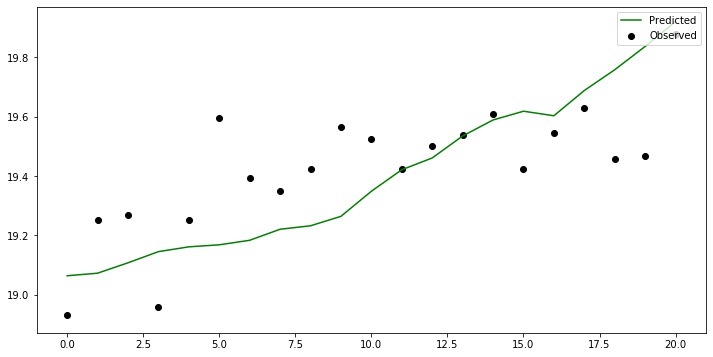

In [19]:
y_lr = lr_elect.predict(X_test)
plt.figure(figsize=(12,6))
plt.scatter(X_test.index, Y_test, label='Observed', color='k')
plt.plot(X_test.index, y_lr, label='Predicted', color='g')
plt.legend(loc='upper right')

Text(0, 0.5, 'Predicted Temp')

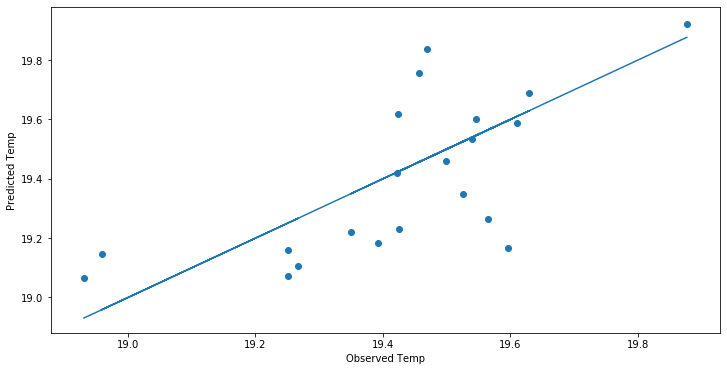

In [20]:
fig = plt.figure(figsize=(12,6))
plt.plot(Y_test, Y_test)
plt.scatter(Y_test,y_lr)
plt.xlabel('Observed Temp')
plt.ylabel('Predicted Temp')